### What is Multicollinearity
Multicollinearity occurs when there is a high correlation between independent variables in regression analysis, leading to issues in the model. 
- Unreliable and unstable estimates
- Inflated standard errors of the coefficients
- Wrong model interpretations
- Perfectly correlation causes numerical instability

In [82]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Unstable coefficients

Text(0.5, 1.0, 'Linear Regression(X2, Y)')

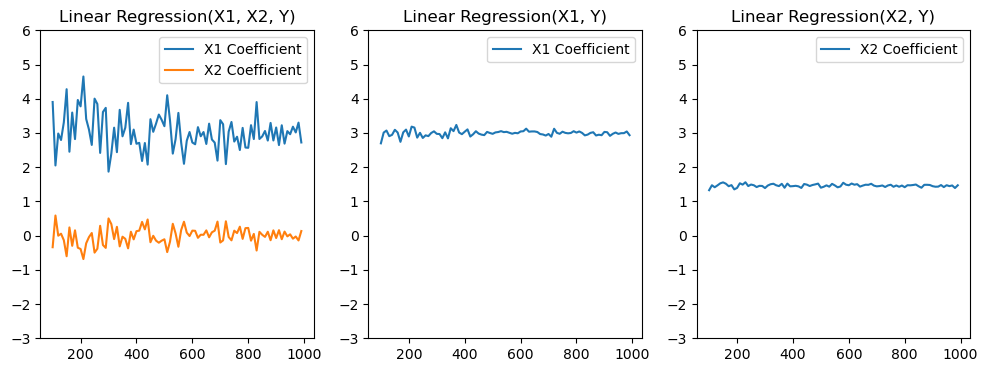

In [94]:
plot_x = []
plot_y1 = []
plot_y2 = []
for n in range(100, 1000, 10):
    X1 = np.random.rand(n)
    X2 = 2 * X1 + np.random.normal(0, 0.1, n)
    Y = 3 * X1 + np.random.normal(0, 0.5, n)
    data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
    X = data[['X1', 'X2']]
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = data['Y']
    model = sm.OLS(y, X).fit()
    plot_x.append(n)
    plot_y1.append(model.params[1])
    plot_y2.append(model.params[2])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(plot_x, plot_y1, label="X1 Coefficient")
plt.plot(plot_x, plot_y2, label="X2 Coefficient")
plt.ylim(bottom=-3, top=6)
plt.legend()
plt.title("Linear Regression(X1, X2, Y)")

plot_x = []
plot_y1 = []
plot_y2 = []
for n in range(100, 1000, 10):
    X1 = np.random.rand(n)
    X2 = 2 * X1 + np.random.normal(0, 0.1, n)
    Y = 3 * X1 + np.random.normal(0, 0.5, n)
    data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
    X = data[['X1']]
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = data['Y']
    model = sm.OLS(y, X).fit()
    plot_x.append(n)
    plot_y1.append(model.params[1])

plt.subplot(1, 3, 2)
plt.plot(plot_x, plot_y1, label="X1 Coefficient")
plt.ylim(bottom=-3, top=6)
plt.legend()
plt.title("Linear Regression(X1, Y)")

plot_x = []
plot_y1 = []
plot_y2 = []
for n in range(100, 1000, 10):
    X1 = np.random.rand(n)
    X2 = 2 * X1 + np.random.normal(0, 0.1, n)
    Y = 3 * X1 + np.random.normal(0, 0.5, n)
    data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
    X = data[['X2']]
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = data['Y']
    model = sm.OLS(y, X).fit()
    plot_x.append(n)
    plot_y1.append(model.params[1])

plt.subplot(1, 3, 3)
plt.plot(plot_x, plot_y1, label="X2 Coefficient")
plt.ylim(bottom=-3, top=6)
plt.legend()
plt.title("Linear Regression(X2, Y)")

### Non-invertable matrix

In [101]:
X1 = np.random.rand(n)
X2 = 2 * X1
Y = 3 * X1 + np.random.normal(0, 0.5, n)
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
X = data[['X1', 'X2']]
X = sm.add_constant(X)  # Add a constant term for intercept
y = data['Y']
model = sm.OLS(y, X).fit()

In [103]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2952.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          4.85e-299
Time:                        08:38:04   Log-Likelihood:                -738.24
No. Observations:                 990   AIC:                             1480.
Df Residuals:                     988   BIC:                             1490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0148      0.032     -0.465      0.6